In [7]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.model_selection import train_test_split;
np.random.seed(42);


In [ ]:
# read space-separated file (use regex separator and python engine)
full_data = pd.read_csv(
    r"F:\Personal Projects\ML-and-DL-Optimisation-Methods\Datasets\housing.csv",
    sep=r'\s+', header=None, encoding="utf-8", engine='python'
);
description = full_data.describe()
# print(full_data.head(10))
full_labeled_data = full_data.copy()

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
];

# assign column names (do not wrap the list in another list)
full_labeled_data.columns = column_names;

#print(full_labeled_data)
print(full_labeled_data.info());

# So no null data and no non numerical data!

#print(full_labeled_data.describe())

#print(full_labeled_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
# Dataframe coverted to numpy array

dataframe_in_numpy = full_data.to_numpy();
ones = np.ones((dataframe_in_numpy.shape[0],1));
#print(ones.shape);
#dataframe_in_numpy=np.insert(dataframe_in_numpy, dataframe_in_numpy.shape[1]-2,1,axis=1);
#print(dataframe_in_numpy[0]);
#print(dataframe_in_numpy.shape);
Y = dataframe_in_numpy[:, 13].reshape(506,1); # Full target data
#Y = np.hstack(((np.ones(Y.shape[0],1)), Y));
#print(Y.shape);
X = dataframe_in_numpy[:,0:13]; # Full input data
X = np.hstack((ones,X));
#print(X.shape);
#print(X);

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2,    # 20% of data goes to testing, 80% to training
    random_state=42   # Sets a seed so your results are reproducible
);


Mean average error: 3.2279918470843403
R^2 Score: 0.6497


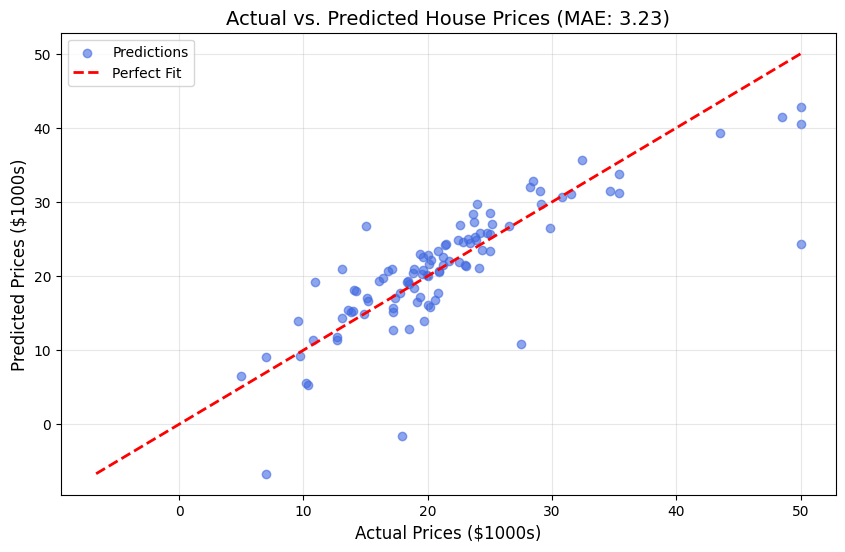

In [12]:
# Running Adagrad

# Initialisations
theta = np.zeros((X.shape[1],1));
#print(theta.shape);
y_pred = np.dot(X_train,theta);
#print(y_pred.shape);
error = y_train-y_pred;
step_size = 0.01;
G = np.zeros(theta.shape);
#print(G.shape);
m = X_train.shape[0];
epsilon = (10**-12);

# Iterating
for i in range(5000001):    
    error = X_train@theta - y_train;
    gradient = (1/m)*((X_train.T)@error);
    G += gradient**2;
    theta = theta - step_size*(gradient)/(np.sqrt(G)+epsilon);
    #if (i%1000==0):
        #print(f"Iteration: {i}");
        #print(theta[0:4]);



# Final Predictions

#print(y_test[0]);
y_final_pred = X_test@theta;
#print(y_final_pred[0]);
final_error = y_final_pred-y_test;
#print(final_error);


#print(theta);


# Mean Absolute Error

mae = np.mean(np.abs(final_error));
print(f"Mean average error: {mae}");





ss_res = np.sum(final_error**2);
ss_tot = np.sum((y_test - np.mean(y_test))**2);
r2 = 1 - (ss_res / ss_tot);
print(f"R^2 Score: {r2:.4f}");


# Plotting errors!

import matplotlib.pyplot as plt
# Set the style
plt.figure(figsize=(10, 6))
# Plotting the scatter points
plt.scatter(y_test, y_final_pred, alpha=0.6, color='royalblue', label='Predictions')
# Plotting the "Perfect Prediction" line
# The line where Actual == Predicted
max_val = max(max(y_test), max(y_final_pred))
min_val = min(min(y_test), min(y_final_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--', label='Perfect Fit')

# Labeling
plt.xlabel('Actual Prices ($1000s)', fontsize=12)
plt.ylabel('Predicted Prices ($1000s)', fontsize=12)
plt.title(f'Actual vs. Predicted House Prices (MAE: {np.mean(np.abs(final_error)):.2f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
print(theta);

[[ 1.85914162e+01]
 [-1.07925682e-01]
 [ 3.17200201e-02]
 [ 3.32586858e-02]
 [ 2.74303361e+00]
 [-1.17556725e+01]
 [ 5.09005319e+00]
 [-9.18439779e-03]
 [-1.27975371e+00]
 [ 2.16101567e-01]
 [-9.75977053e-03]
 [-7.38913070e-01]
 [ 1.39749357e-02]
 [-4.79860149e-01]]
